<a href="https://colab.research.google.com/github/yusukeorito/Master_research/blob/main/exp011/notebooks/Exp011_result001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Master_research/exp011

/content/drive/MyDrive/Master_research/exp011


In [15]:
import os
import sys
import pathlib
import random
import logging

import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
import warnings
from tqdm import tqdm

import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Activation
from tensorflow.keras.callbacks import Callback,ModelCheckpoint
from tensorflow.keras.activations import relu
from tensorflow.keras.utils import plot_model

sys.path.append('../')
warnings.simplefilter('ignore')
logging.getLogger('tensorflow').setLevel(logging.ERROR)

class CFG:
    seed1 = 820
    seed2=314
    data='Fashion MNIST'
    data_seed = 42
    save_dir = '../Model/'
    output_dir = '../Output/'
    L=10
    M=60000
    N=100
    C=50
    A=0#ノイズの強さ
    ini_type = 'A'
    train='train'
    mean = 0.5  # 平均
    std_dev = 0.1  # 標準偏差
    layer_name_list =['batch_normalization1', 'batch_normalization2', 'batch_normalization3',
                   'batch_normalization4', 'batch_normalization5', 'batch_normalization6', 'batch_normalization7', 'batch_normalization8',
                   'batch_normalization9','batch_normalization10',]
    #layer_name_list = ['batch_normalization1', 'batch_normalization5', 'batch_normalization9']
    #label_list = [1,5,10]

## 時間変化

In [16]:
with open(f'./Output/Overlap/q/M{CFG.M}/q2_stopW_ini{CFG.ini_type}_L{CFG.L}_C{CFG.C}_{CFG.train}.txt','rb') as f:
  q2=pickle.loads(f.read())

with open(f'./Output/Overlap/q/M{CFG.M}/sim_q_stopW_ini{CFG.ini_type}_L{CFG.L}_C{CFG.C}_{CFG.train}.txt','rb') as f:
  sim_q=pickle.loads(f.read())

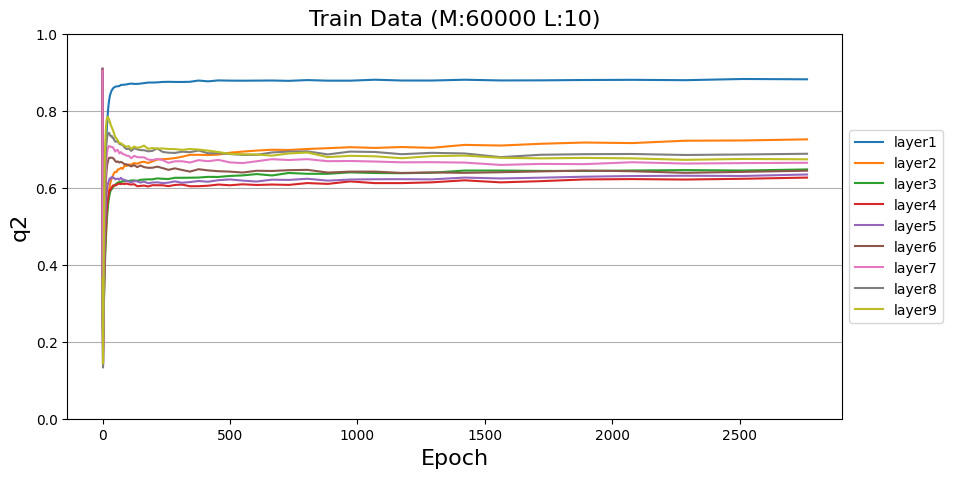

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
for i, l in enumerate(CFG.layer_name_list[:-1]):
    ax.plot(q2['time'],q2[l],label=f'layer{i+1}')
ax.set_xlabel('Epoch',fontsize=16)
ax.set_ylabel('q2', fontsize=16)
#ax.set_xscale('log')
ax.set_title(f'Train Data (M:{CFG.M} L:{CFG.L})',fontsize=16)
ax.set_ylim(0,1)
ax.grid(axis='y')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

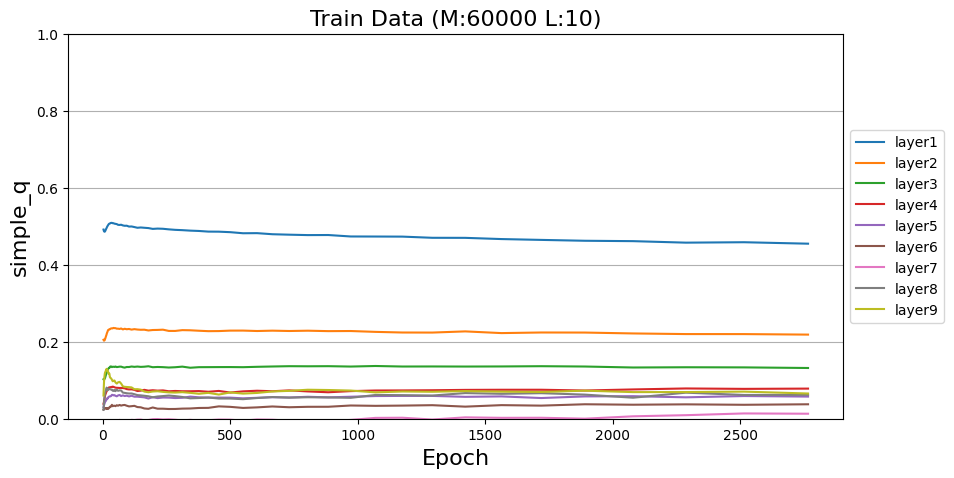

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
for i, l in enumerate(CFG.layer_name_list[:-1]):
    ax.plot(sim_q['time'][3:],sim_q[l][3:],label=f'layer{i+1}')
ax.set_xlabel('Epoch',fontsize=16)
ax.set_ylabel('simple_q', fontsize=16)
#ax.set_xscale('log')
ax.set_title(f'Train Data (M:{CFG.M} L:{CFG.L})',fontsize=16)
ax.set_ylim(0,1)
ax.grid(axis='y')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## 空間変化

In [ ]:
with open(f'./Output/Overlap/Layer_q/M{CFG.M}/layerq_norm_stopW_ini{CFG.ini_type}_L{CFG.L}_C{CFG.C}_train.txt','rb') as f:
    layer_q =pickle.loads(f.read())

(0.0, 1.0)

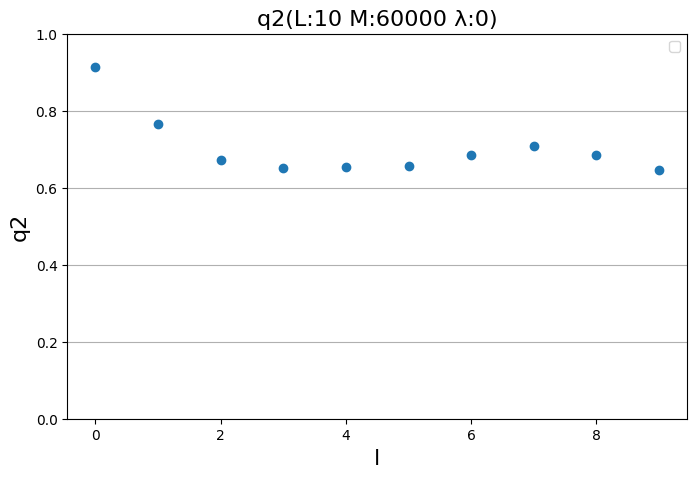

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(layer_q['q2'],'.',markersize=12)
ax.set_xlabel('l',fontsize=16)
ax.set_ylabel('q2',fontsize=16)
ax.set_title(f'q2(L:{CFG.L} M:{CFG.M} λ:{CFG.A})',fontsize=16)
ax.legend()
ax.grid(axis='y')
ax.set_ylim(0,1)

## Loss

In [ ]:
with open(f'./Output/Loss/M{CFG.M}/perform001_ini{CFG.ini_type}_L{CFG.L}_C{CFG.C}_{CFG.train}.txt','rb') as f:
    history=pickle.loads(f.read())

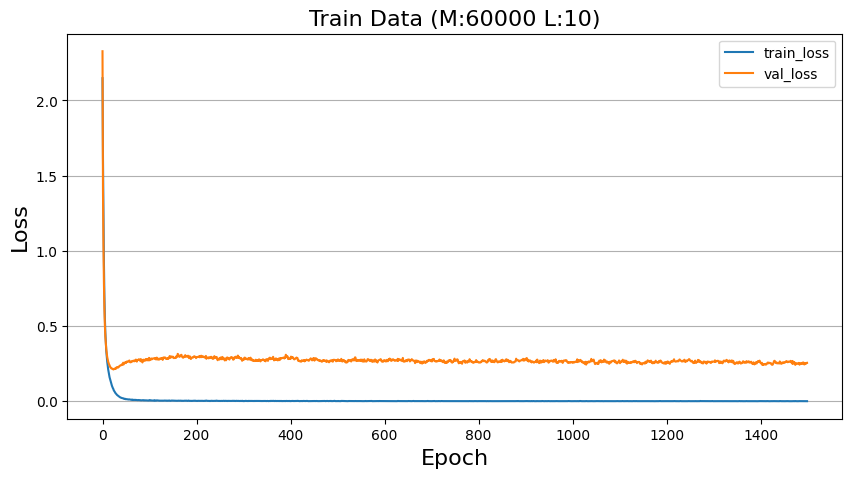

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(history['loss'],label='train_loss')
ax.plot(history['val_loss'],label='val_loss')
ax.set_xlabel('Epoch',fontsize=16)
ax.set_ylabel('Loss', fontsize=16)
#ax.set_xscale('log')
ax.set_title(f'Train Data (M:{CFG.M} L:{CFG.L})',fontsize=16)
ax.grid(axis='y')
ax.legend()

In [ ]:
history_list=[]
for C in [10,30,50, 100]:
  with open(f'./Output/Loss/M{CFG.M}/perform002_ini{CFG.ini_type}_L{CFG.L}_C{C}_{CFG.train}.txt','rb') as f:
    history=pickle.loads(f.read())
  history_list.append(history)

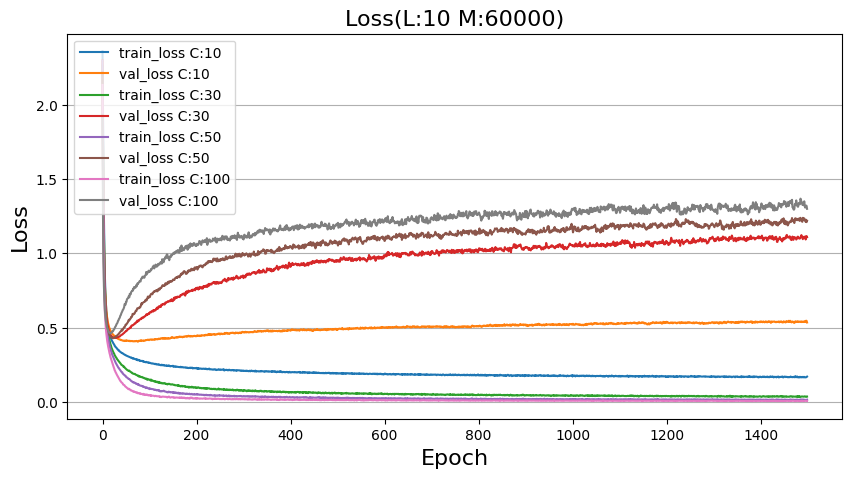

In [ ]:
c_list =[10,30,50, 100]
fig, ax = plt.subplots(figsize=(10,5))
for history, c in zip(history_list,c_list):
  ax.plot(history['loss'],label=f'train_loss C:{c}')
  ax.plot(history['val_loss'],label=f'val_loss C:{c}')
  ax.set_xlabel('Epoch',fontsize=16)
  ax.set_ylabel('Loss', fontsize=16)
  ax.set_title(f'Loss(L:{CFG.L} M:{CFG.M})',fontsize=16)


ax.grid(axis='y')
ax.legend()

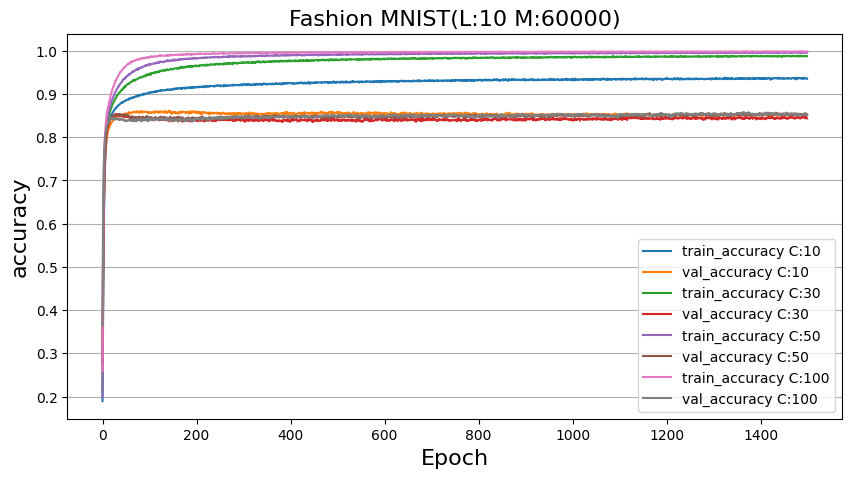

In [ ]:
c_list =[10,30,50, 100]
fig, ax = plt.subplots(figsize=(10,5))
for history, c in zip(history_list,c_list):
  ax.plot(history['accuracy'],label=f'train_accuracy C:{c}')
  ax.plot(history['val_accuracy'],label=f'val_accuracy C:{c}')
  ax.set_xlabel('Epoch',fontsize=16)
  ax.set_ylabel('accuracy', fontsize=16)
  ax.set_title(f'{CFG.data}(L:{CFG.L} M:{CFG.M})',fontsize=16)
  ax.legend()
ax.grid(axis='y')

## 初期条件による比較

In [19]:
with open(f'./Output/Overlap/q/M{CFG.M}/q2_stopW_iniA_L{CFG.L}_C{CFG.C}_{CFG.train}.txt','rb') as f:
  q2_a=pickle.loads(f.read())

with open(f'./Output/Overlap/q/M{CFG.M}/sim_q_stopW_iniA_L{CFG.L}_C{CFG.C}_{CFG.train}.txt','rb') as f:
  sim_q_a=pickle.loads(f.read())

with open(f'./Output/Overlap/q/M{CFG.M}/q2_stopW_iniB_L{CFG.L}_C{CFG.C}_{CFG.train}.txt','rb') as f:
  q2_b=pickle.loads(f.read())

with open(f'./Output/Overlap/q/M{CFG.M}/sim_q_stopW_iniB_L{CFG.L}_C{CFG.C}_{CFG.train}.txt','rb') as f:
  sim_q_b=pickle.loads(f.read())

with open(f'./Output/Overlap/Layer_q/M{CFG.M}/layerq_stopW_iniA_L{CFG.L}_C{CFG.C}_train.txt','rb') as f:
  layer_q_a =pickle.loads(f.read())

with open(f'./Output/Overlap/Layer_q/M{CFG.M}/layerq_stopW_iniB_L{CFG.L}_C{CFG.C}_train.txt','rb') as f:
  layer_q_b =pickle.loads(f.read())

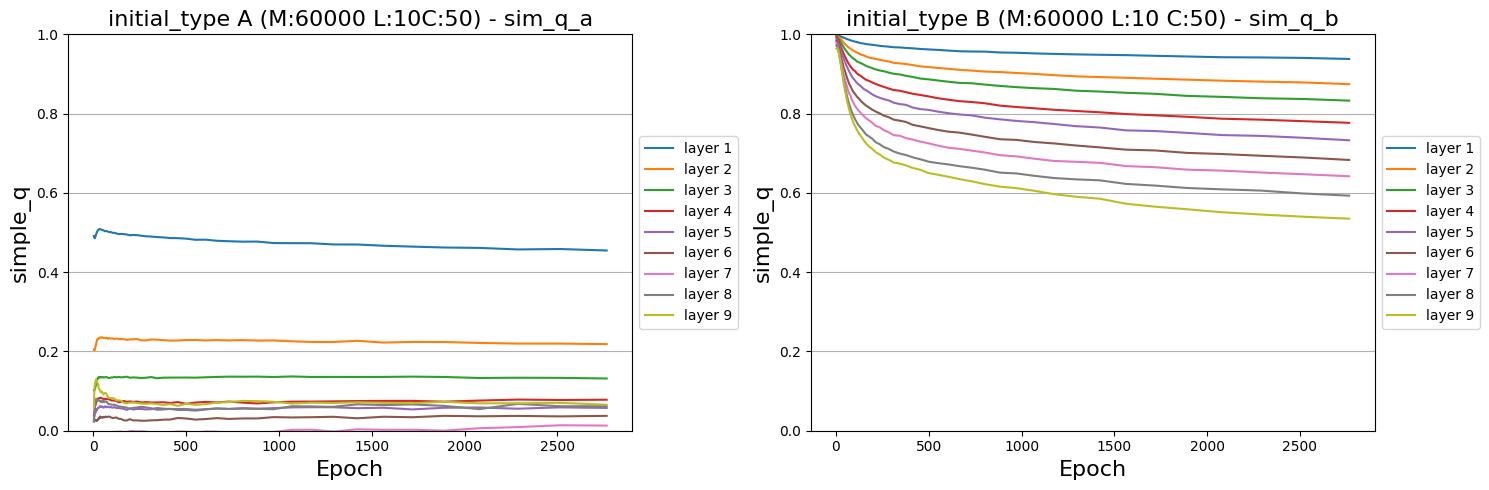

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot for sim_q_a
for i, l in enumerate(CFG.layer_name_list[:-1]):
    axs[0].plot(sim_q_a['time'][3:], sim_q_a[l][3:], label=f'layer {i+1}')
axs[0].set_xlabel('Epoch', fontsize=16)
axs[0].set_ylabel('simple_q', fontsize=16)
axs[0].set_title(f'initial_type A (M:{CFG.M} L:{CFG.L}C:{CFG.C}) - sim_q_a', fontsize=16)
axs[0].set_ylim(0, 1)
axs[0].grid(axis='y')
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plot for sim_q_b
for i, l in enumerate(CFG.layer_name_list[:-1]):
    axs[1].plot(sim_q_b['time'][3:], sim_q_b[l][3:], label=f'layer {i+1}')
axs[1].set_xlabel('Epoch', fontsize=16)
axs[1].set_ylabel('simple_q', fontsize=16)
axs[1].set_title(f'initial_type B (M:{CFG.M} L:{CFG.L} C:{CFG.C}) - sim_q_b', fontsize=16)
axs[1].set_ylim(0, 1)
axs[1].grid(axis='y')
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


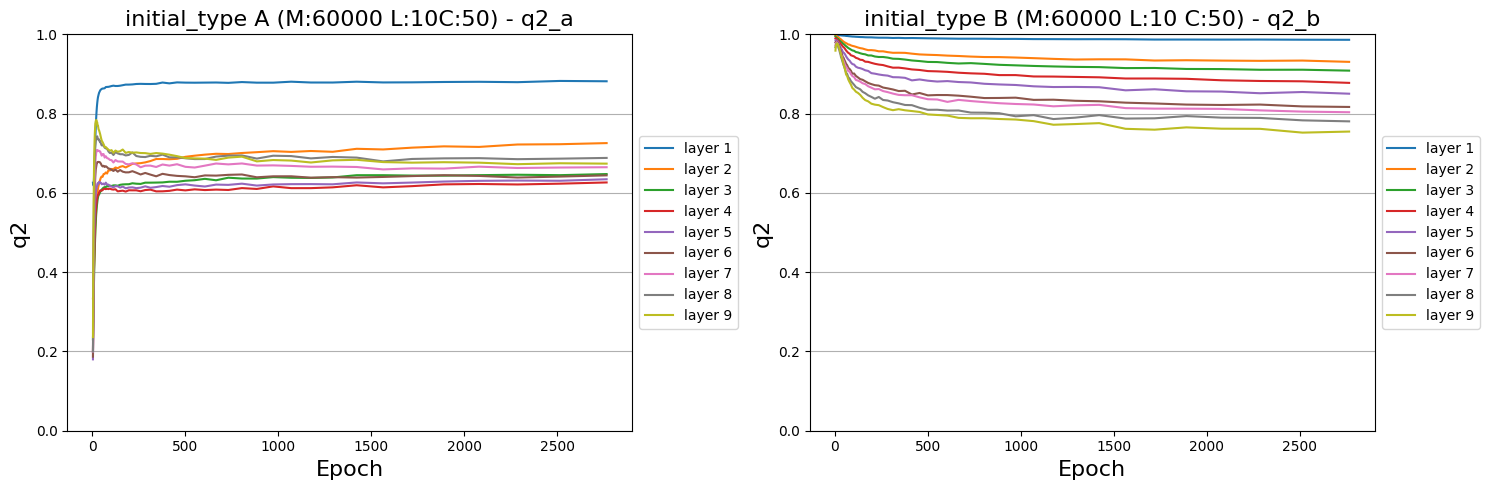

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot for q2_a
for i, l in enumerate(CFG.layer_name_list[:-1]):
    axs[0].plot(q2_a['time'][3:], q2_a[l][3:], label=f'layer {i+1}')
axs[0].set_xlabel('Epoch', fontsize=16)
axs[0].set_ylabel('q2', fontsize=16)
axs[0].set_title(f'initial_type A (M:{CFG.M} L:{CFG.L}C:{CFG.C}) - q2_a', fontsize=16)
axs[0].set_ylim(0, 1)
axs[0].grid(axis='y')
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plot for q2_b
for i, l in enumerate(CFG.layer_name_list[:-1]):
    axs[1].plot(q2_b['time'][3:], q2_b[l][3:], label=f'layer {i+1}')
axs[1].set_xlabel('Epoch', fontsize=16)
axs[1].set_ylabel('q2', fontsize=16)
axs[1].set_title(f'initial_type B (M:{CFG.M} L:{CFG.L} C:{CFG.C}) - q2_b', fontsize=16)
axs[1].set_ylim(0, 1)
axs[1].grid(axis='y')
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

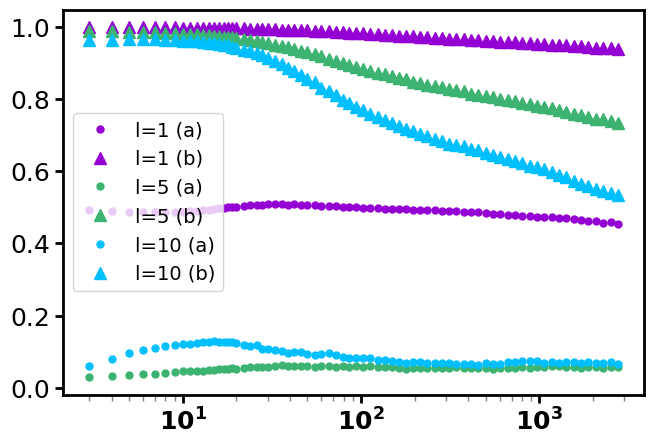

In [25]:
class CFG:
  layer_name_list = ['batch_normalization1', 'batch_normalization5', 'batch_normalization9']
  label_list = [1,5,10]
clrs = ['darkviolet', 'mediumseagreen', 'deepskyblue']
fig, ax = plt.subplots(figsize=(7.5, 5))

for i, (l, n) in enumerate(zip(CFG.layer_name_list, CFG.label_list)):
    color = clrs[i]
    ax.plot(sim_q_a['time'][3:], sim_q_a[l][3:], '.', label=f'l={n} (a)', color=color, markersize=10)
    ax.plot(sim_q_b['time'][3:], sim_q_b[l][3:], '^', label=f'l={n} (b)', color=color, markersize=8)

ax.set_xscale('log')
#y_ticks = ['0', '0.2', '0.4', '0.6', '0.8', '1']
#ax.set_yticks([float(tick) for tick in y_ticks])
#ax.set_yticklabels(y_ticks, weight='bold')  # フォントを太字に設定
#ax.set_ylim(0, 1)

# 軸の値のスタイルを設定
ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6, color='black')
ax.tick_params(axis='both', which='minor', width=1, length=4, color='gray')

# 軸の値を太字に設定
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')

# 軸のラベルを太字に設定
ax.xaxis.label.set_fontweight('bold')
ax.yaxis.label.set_fontweight('bold')

# 軸の枠線のスタイルを設定
ax.spines['top'].set_linewidth(2)      # 上枠線の太さを2に設定
ax.spines['bottom'].set_linewidth(2)   # 下枠線の太さを2に設定
ax.spines['left'].set_linewidth(2)     # 左枠線の太さを2に設定
ax.spines['right'].set_linewidth(2)    # 右枠線の太さを2に設定

# 凡例のスタイルを設定
ax.legend(fontsize=14)
#ax.set_title(f'M:{CFG.M} λ:{CFG.A}')

plt.show()

### 空間依存性

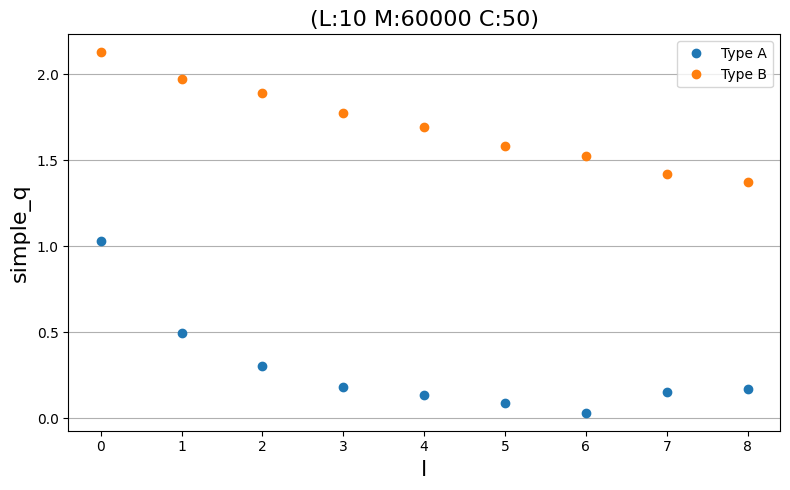

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))

# layer_q_aのプロット
ax.plot(layer_q_a['sim_q'][:-1], '.', markersize=12, label='Type A')

# layer_q_bのプロット
ax.plot(layer_q_b['sim_q'][:-1], '.', markersize=12, label='Type B')

ax.set_xlabel('l', fontsize=16)
ax.set_ylabel('simple_q', fontsize=16)
ax.set_title(f'(L:{CFG.L} M:{CFG.M} C:{CFG.C})', fontsize=16)
ax.legend()
ax.grid(axis='y')
#ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()


In [ ]:
layer_q_b['sim_q']

[2.1266155,
 1.9731158,
 1.888831,
 1.7744546,
 1.6906474,
 1.5815073,
 1.5211074,
 1.4211278,
 1.3730049,
 179.8438]